# A 90° Bend

We'll start a new simulation where we look at the fields propagating through a waveguide bend, and we'll do a couple of other things differently as well. 

As usual, the first thing to do is to load the Meep library:

In [1]:
import meep as mp
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Video
%matplotlib inline

Then let's set up the bent waveguide in a slightly larger cell:

In [2]:
cell = mp.Vector3(16,16,0)
geometry = [mp.Block(mp.Vector3(12,1,mp.inf),
                     center=mp.Vector3(-2.5,-3.5),
                     material=mp.Medium(epsilon=12)),
            mp.Block(mp.Vector3(1,12,mp.inf),
                     center=mp.Vector3(3.5,2),
                     material=mp.Medium(epsilon=12))]
pml_layers = [mp.PML(1.0)]
resolution = 10

Note that we have two blocks, both off-center to produce the bent waveguide structure pictured below. As illustrated in the figure, the origin (0,0) of the coordinate system is at the center of the cell, with positive $y$ being downwards, and thus the block of size 12$\times$1 is centered at (-2,-3.5). Also shown in green is the source plane at $x=−7$ which is shifted to $y=−3.5$ so that it is still inside the waveguide.

There are a couple of items to note. First, a point source does not couple very efficiently to the waveguide mode, so we'll expand this into a line source, centered at (-7,-3.5), with the same width as the waveguide by adding a `size` property to the source. This is shown in green in the figure above. An eigenmode source can also be used which is described in Tutorial/Optical Forces. Second, instead of turning the source on suddenly at t=0 which excites many other frequencies because of the discontinuity, we will ramp it on slowly. Meep uses a hyperbolic tangent (tanh) turn-on function over a time proportional to the `width` of 20 time units which is a little over three periods. Finally, just for variety, we'll specify the vacuum wavelength instead of the frequency; again, we'll use a wavelength such that the waveguide is half a wavelength wide.

In [3]:
sources = [mp.Source(mp.ContinuousSource(wavelength=2*(11**0.5), width=20),
                     component=mp.Ez,
                     center=mp.Vector3(-7,-3.5),
                     size=mp.Vector3(0,1))]

Now we'll set up and visualize the simulation domain.

In [4]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

-----------
Initializing structure...
     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (3.5,2,0)
          size (1,12,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)


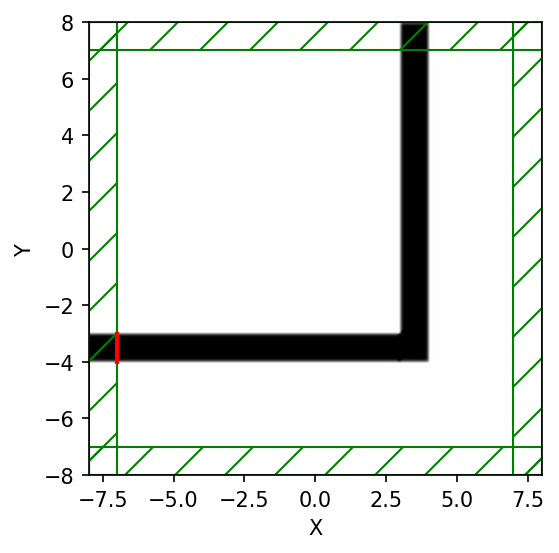

In [5]:
f = plt.figure(dpi=150)
sim.plot2D(ax = f.gca())
plt.show()

As we expect, we see the bent waveguide structure with PML boundaries (green) and a source (red) with the same size as the waveguide width.

In [6]:
f = plt.figure(dpi=150)
Animate = mp.Animate2D(sim, fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(0.5,Animate),until=150)
plt.close()

Normalizing field data...
run 0 finished at t = 150.0 (3000 timesteps)


In [7]:
filename = "media/bent_waveguide.mp4"
fps = 10
Animate.to_mp4(fps,filename)
Video(filename)

Generating MP4...


It is clear that the transmission around the bend is rather low for this frequency and structure — both large reflection and large radiation loss are clearly visible. Moreover, since we are operating just barely below the cutoff for single-mode behavior, we are able to excite a second leaky mode after the waveguide bend, whose second-order mode pattern (superimposed with the fundamental mode) is apparent in the animation. 

Below, we show a field snapshot from a simulation with a larger cell along the y direction, in which you can see that the second-order leaky mode decays away, leaving us with the fundamental mode propagating upward.

-----------
Initializing structure...
     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (3.5,17,0)
          size (1,42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
run 1 finished at t = 400.0 (8000 timesteps)


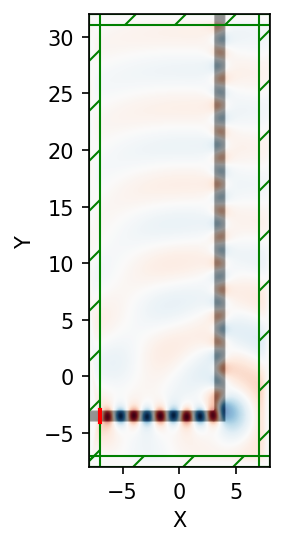

In [8]:
sim.reset_meep()
cell = mp.Vector3(16,40,0)
geometry = [mp.Block(mp.Vector3(12,1,mp.inf),
                     center=mp.Vector3(-2.5,-3.5),
                     material=mp.Medium(epsilon=12)),
            mp.Block(mp.Vector3(1,42,mp.inf),
                     center=mp.Vector3(3.5,17),
                     material=mp.Medium(epsilon=12))]
sim.cell_size = cell
sim.geometry = geometry
sim.geometry_center = mp.Vector3(0,12,0)

sim.run(until=400)

plt.figure(dpi=150)
sim.plot2D(fields=mp.Ez)
plt.show()

Instead of doing an animation, another interesting possibility is to make an image from a $x\times t$ slice. To get the $y=−3.5$ slice, which gives us an image of the fields in the first waveguide branch as a function of time, we can use `get_array` in a step function to collect a slice for each time step

-----------
Initializing structure...
     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (3.5,17,0)
          size (1,42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
run 2 finished at t = 200.0 (4000 timesteps)


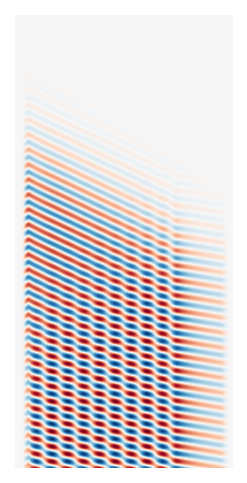

In [9]:
vals = []

def get_slice(sim):
    vals.append(sim.get_array(center=mp.Vector3(0,-3.5), size=mp.Vector3(16,0), component=mp.Ez))

sim.reset_meep()
sim.run(mp.at_beginning(mp.output_epsilon),
        mp.at_every(0.6, get_slice),
        until=200)

plt.figure(dpi=150)
plt.imshow(vals, interpolation='spline36', cmap='RdBu')
plt.axis('off')
plt.show()
